<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# K-Means Clustering with Seeds Data

_Instructor: Aymeric Flaisler_

---

In this lab we are going to try to group some plants using the K-Means algorithm.

In [171]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

import seaborn as sns

### 1. Import the data

In [172]:
seeds = pd.read_csv("./seeds.csv")

In [173]:
# Taking a peek
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### 2. Do some EDA of relationships between features.

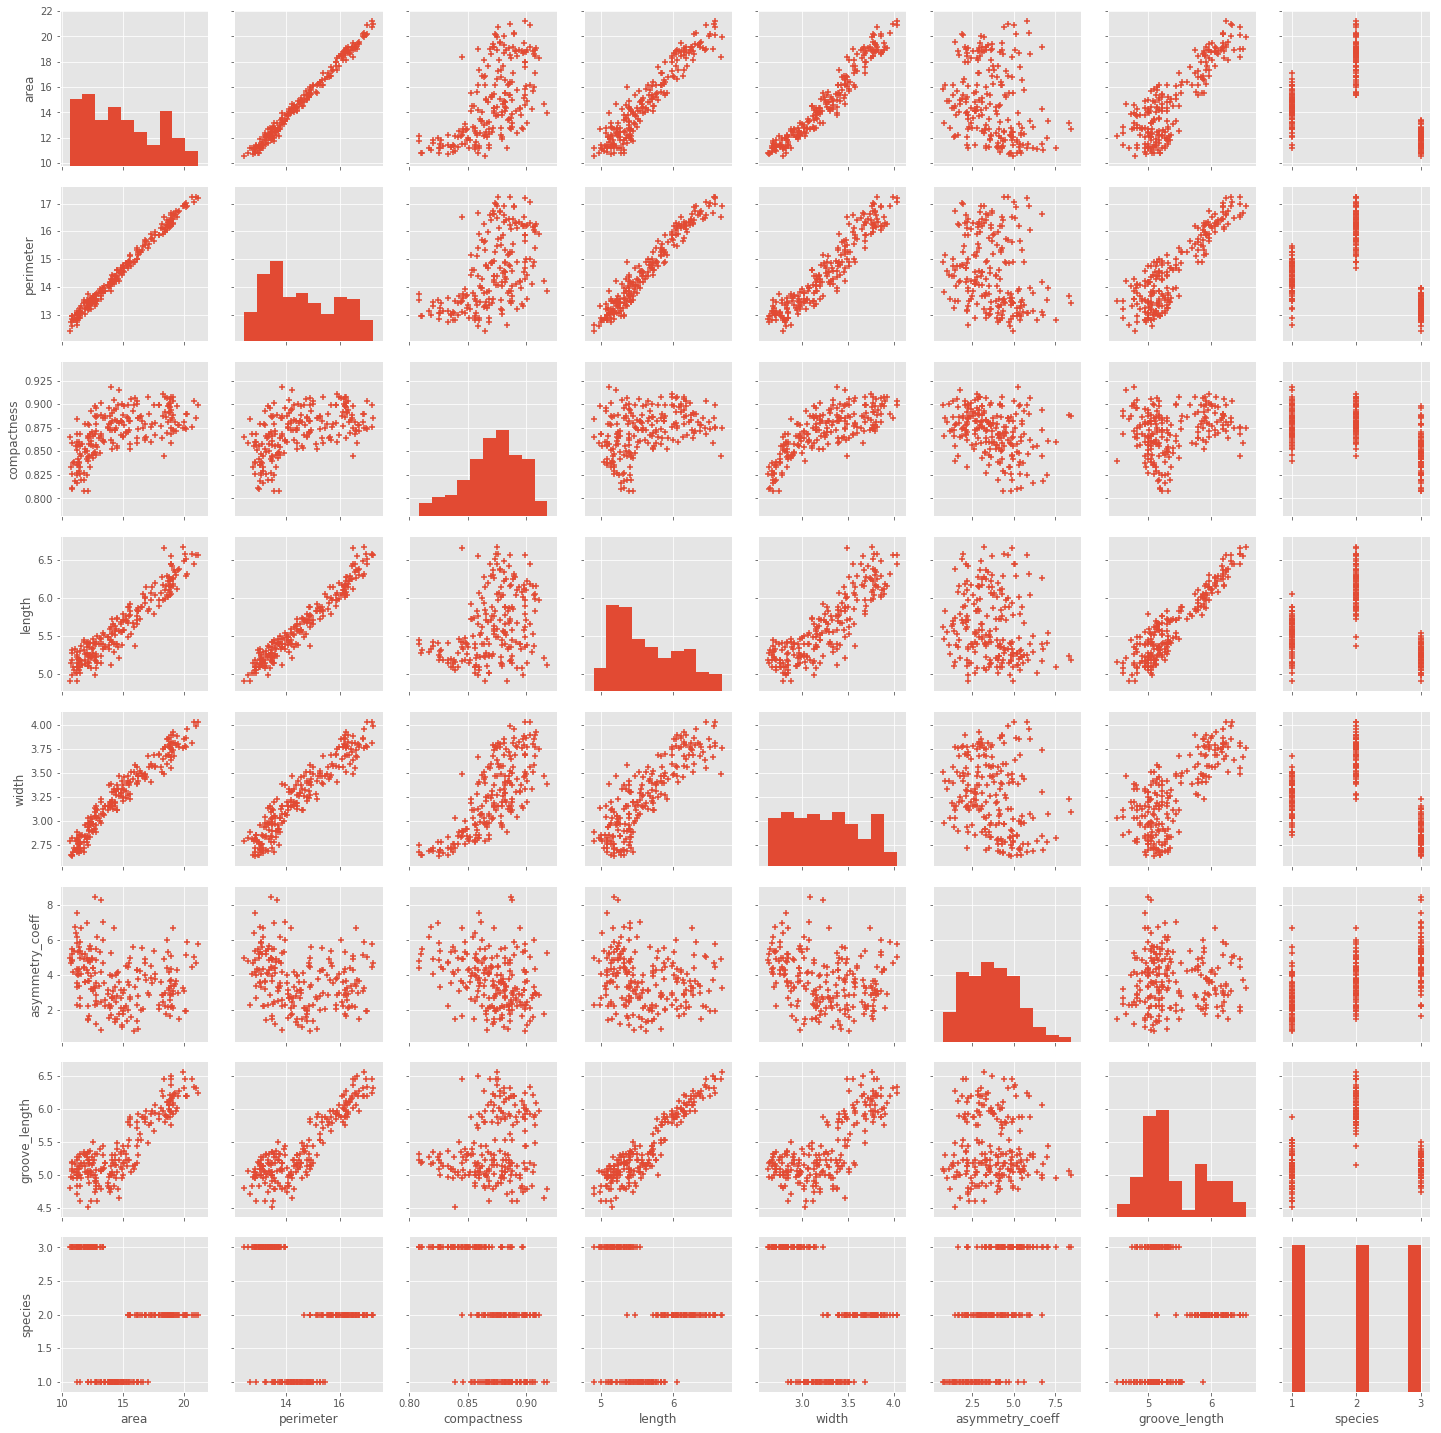

In [174]:
# Plot the Data to see the distributions/relationships
import seaborn as sns

# Plot with and without the "species" hue.
sns.pairplot(seeds, markers="+")
# sns.pairplot(seeds, hue='species')

In [175]:
# Check for nulls:
seeds.isnull().sum().sum()

0

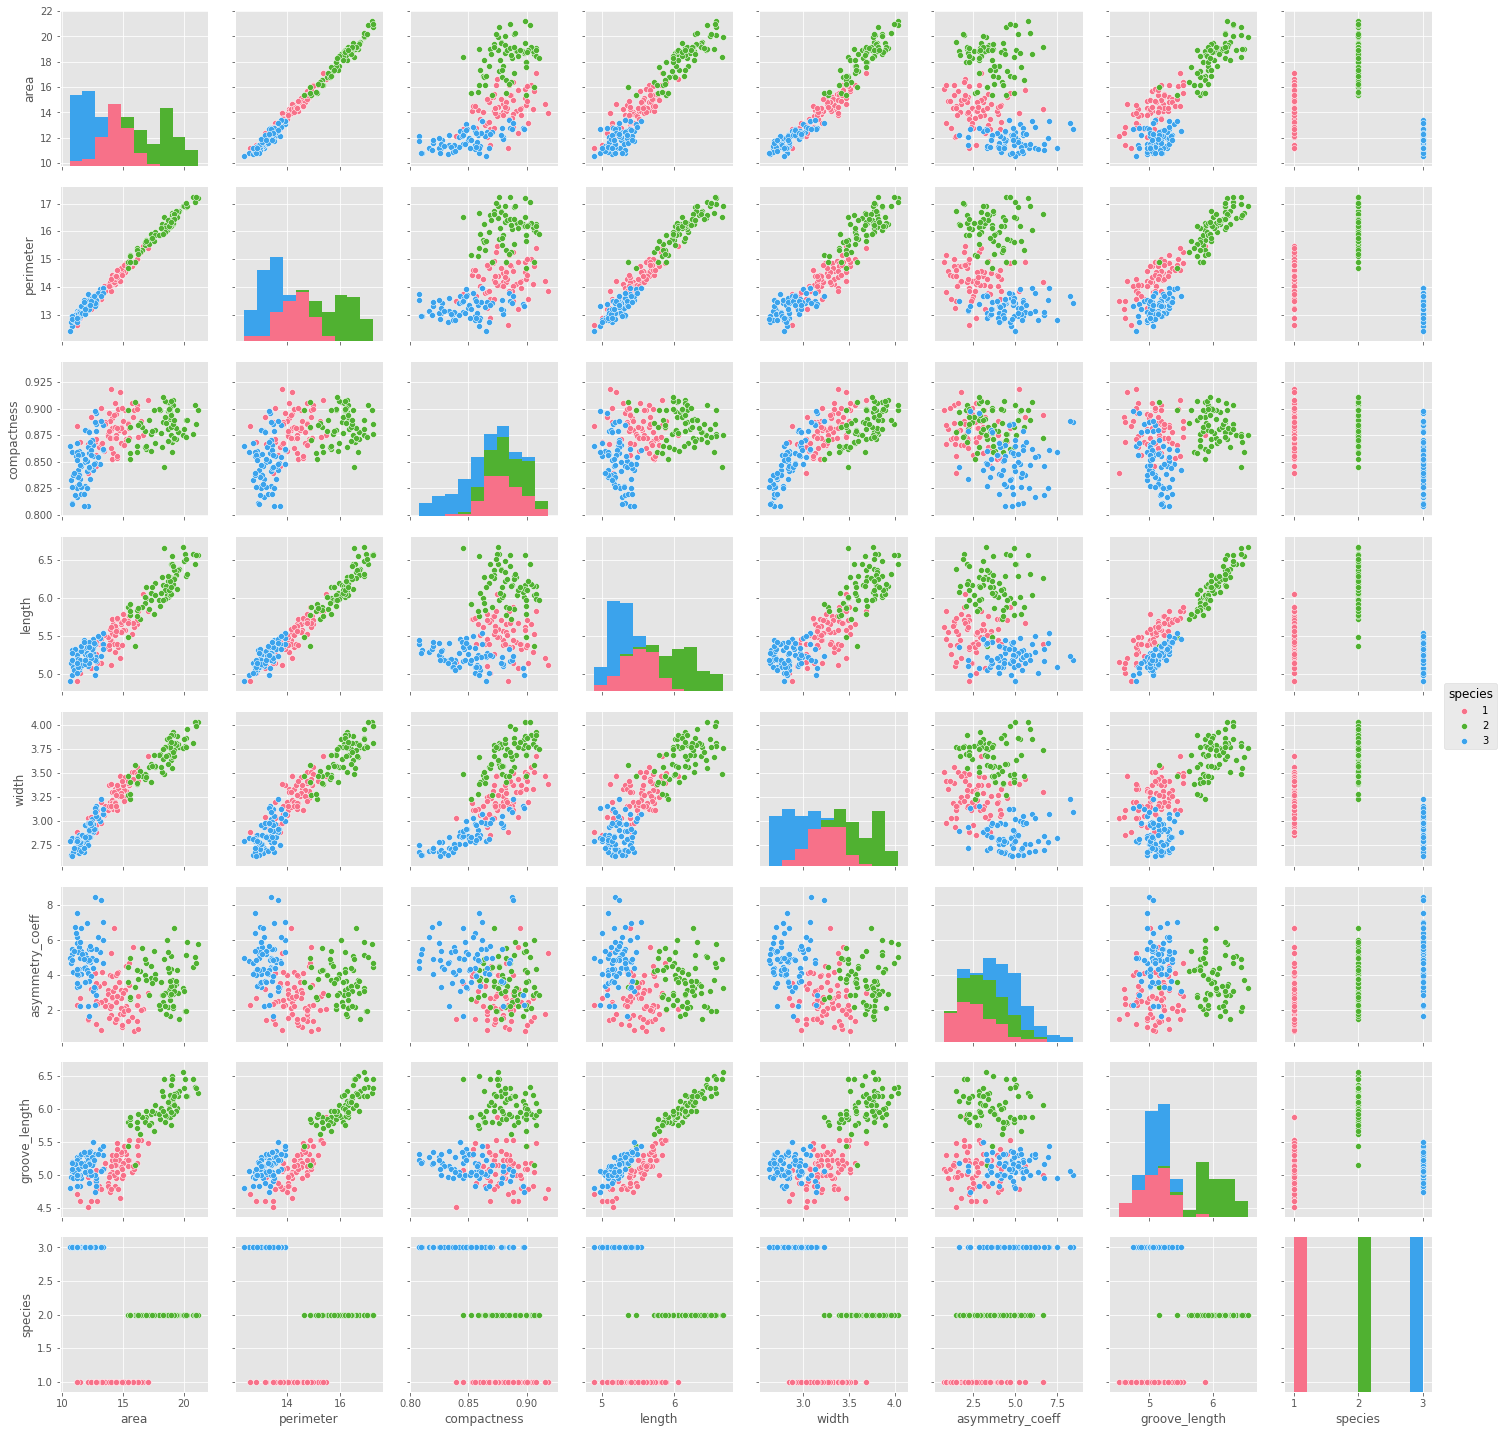

In [176]:
# Look at the real species labels.
sns.pairplot(data=seeds, hue='species', palette="husl")
# classes appear to have a similar number of samples.
# magenta consistently looks like the divisor between the green and red classes.

Remember, clustering is a unsupervised learning method so known classes will never be a thing.  In this situation we can see that the `perimiter` vs. `groove_length` is a good visualization to view the proper classes class, and we can use later to compare the results of clustering to a true value.

### 3. Prepare the data for clustering

1. Remove the `species` column. We will see if the clusters from K-Means end up like the actual species.
2. Put the features on the same scale.

#drop 'species', which is currently acting as a target (categorical):


In [177]:
seeds.drop('species', axis=1, inplace=True)

In [178]:
X = seeds.copy(deep=True)

In [179]:
X.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [180]:
# necessary processing imports
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
Xstd = SS.fit_transform(X)

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
- We know that there are 3 actual classes. However, in an actual situation in which we used clustering we would have no idea. Lets initally try using the default K for `KMeans`(8).

In [181]:
from sklearn.cluster import KMeans

k_mean = KMeans()
k_mean.fit(Xstd)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### 5. Get the labels and centroids for out first clustering model.

In [182]:
# A:
print(k_mean.labels_)

[0 0 2 2 0 2 0 2 7 0 7 0 2 2 2 2 2 2 2 4 0 0 0 4 0 0 4 4 0 4 4 0 0 0 0 0 7
 7 0 5 2 2 2 7 0 2 0 0 0 0 0 7 0 0 0 0 2 2 0 4 4 4 2 4 4 2 0 0 0 4 7 7 7 3
 7 7 7 6 6 7 7 6 6 3 3 3 3 6 6 6 3 3 3 6 6 7 6 3 3 3 7 3 6 6 3 3 3 7 6 3 3
 6 3 6 6 3 3 3 3 6 6 3 7 3 2 3 6 3 3 7 3 3 7 7 7 0 7 7 7 7 5 5 5 5 1 1 4 4
 4 1 1 1 1 1 1 1 4 1 1 1 4 1 1 4 5 4 1 4 1 1 1 5 1 1 1 1 1 1 1 4 1 5 5 5 5
 1 1 1 5 5 1 4 4 1 4 5 5 5 4 2 5 2 4 5 4 4 1 5 4 5]


In [183]:
print(k_mean.cluster_centers_)

[[ 0.01891316  0.03287841  0.29405275  0.03293515  0.09747134 -0.88059227
  -0.3706604 ]
 [-1.1791648  -1.09465061 -1.64667946 -0.88368637 -1.38881103  0.82575592
  -0.52889397]
 [-0.30700408 -0.43311788  0.99773137 -0.73885382  0.03591056 -0.65481244
  -1.06969404]
 [ 1.37576173  1.33846846  0.83809979  1.27720883  1.30581757 -0.67644501
   1.33975556]
 [-0.89044986 -0.90330883 -0.47081532 -0.86326133 -0.87480614 -0.4073574
  -0.81124588]
 [-0.8178496  -0.86448135 -0.14629273 -0.87302479 -0.6797909   1.54102714
  -0.62801516]
 [ 1.64556535  1.66047756  0.4452605   1.71036309  1.45520743  0.62861421
   1.66067624]
 [ 0.57232443  0.63820573  0.18671412  0.63096184  0.53395814  0.21951101
   0.70655165]]


### 6. Compute the silouette score and visually examine the results of the 8 clusters. 

_(pairplot with hue)_

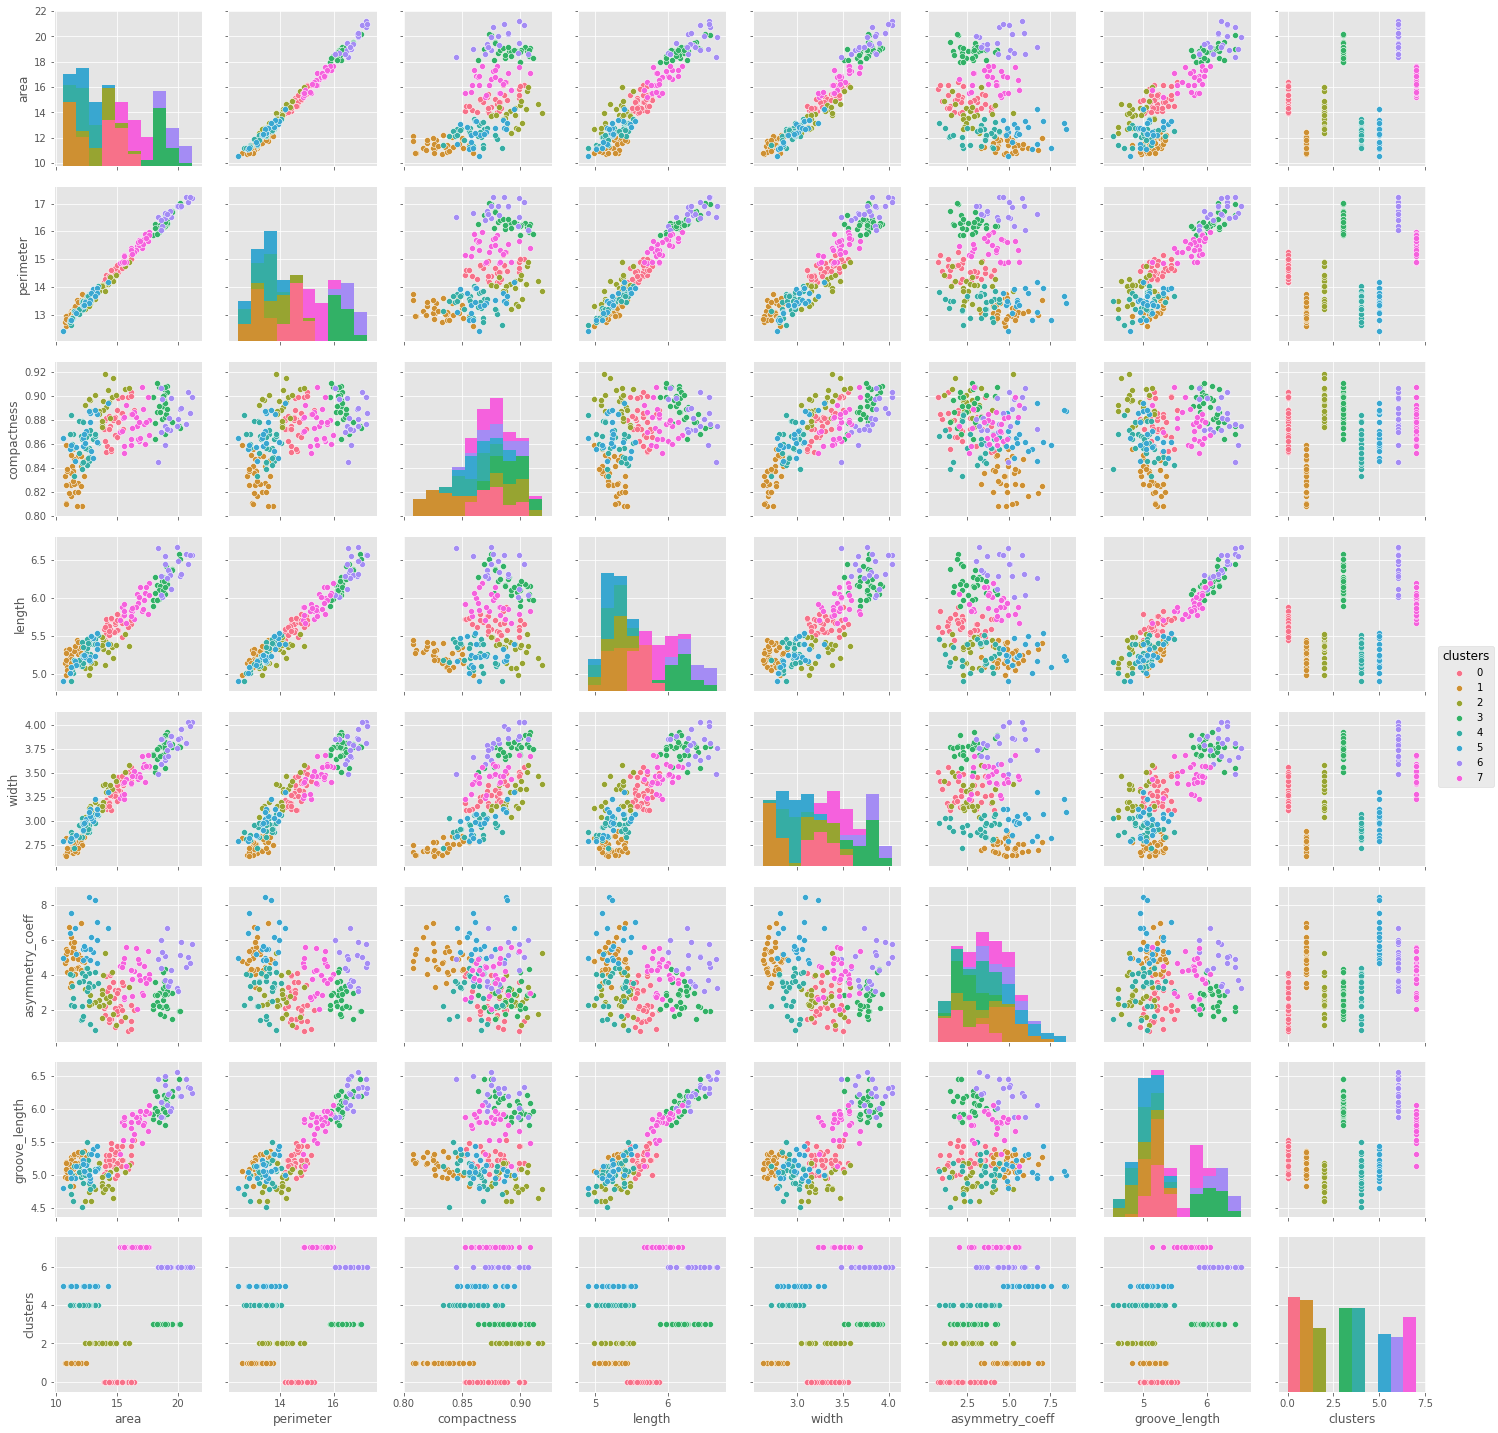

In [184]:
from sklearn.metrics import silhouette_score

# A:
labels = k_mean.labels_
Xwith8 = seeds.copy(deep=True)
Xwith8['clusters']= labels
sns.pairplot(data=Xwith8, hue='clusters');

### 7. Repeat steps #4 and #6 with two selected or random K values and compare the results to the k=8 model.

In [185]:
import random

random.randint(1,25), random.randint(1,25)

(1, 5)

In [186]:
# A:

k_mean_4 = KMeans(4)
k_mean_4.fit(Xstd)

k_mean_6 = KMeans(6)
k_mean_6.fit(Xstd)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

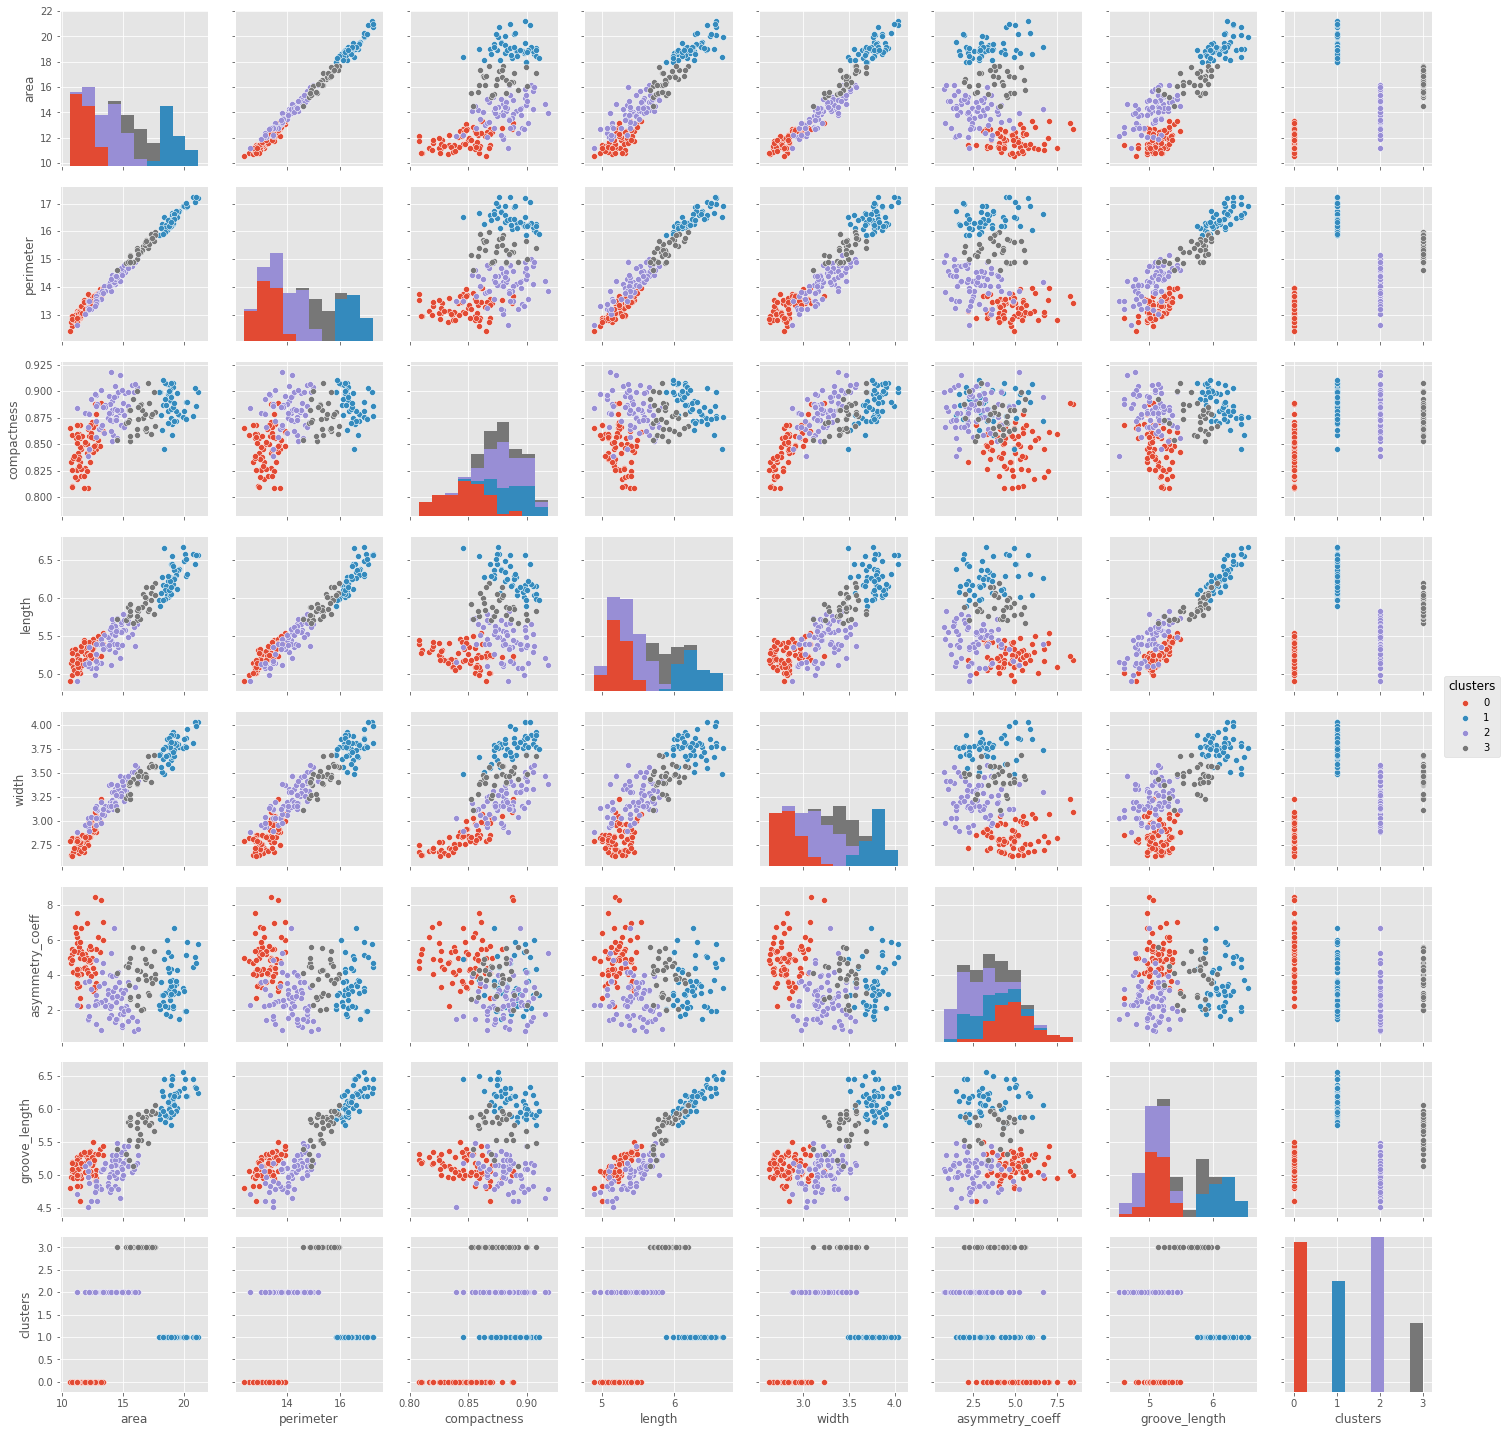

In [195]:
labels = k_mean_4.labels_
Xwith4 = seeds.copy(deep=True)
Xwith4['clusters']= labels
sns.pairplot(data=Xwith4, hue='clusters');

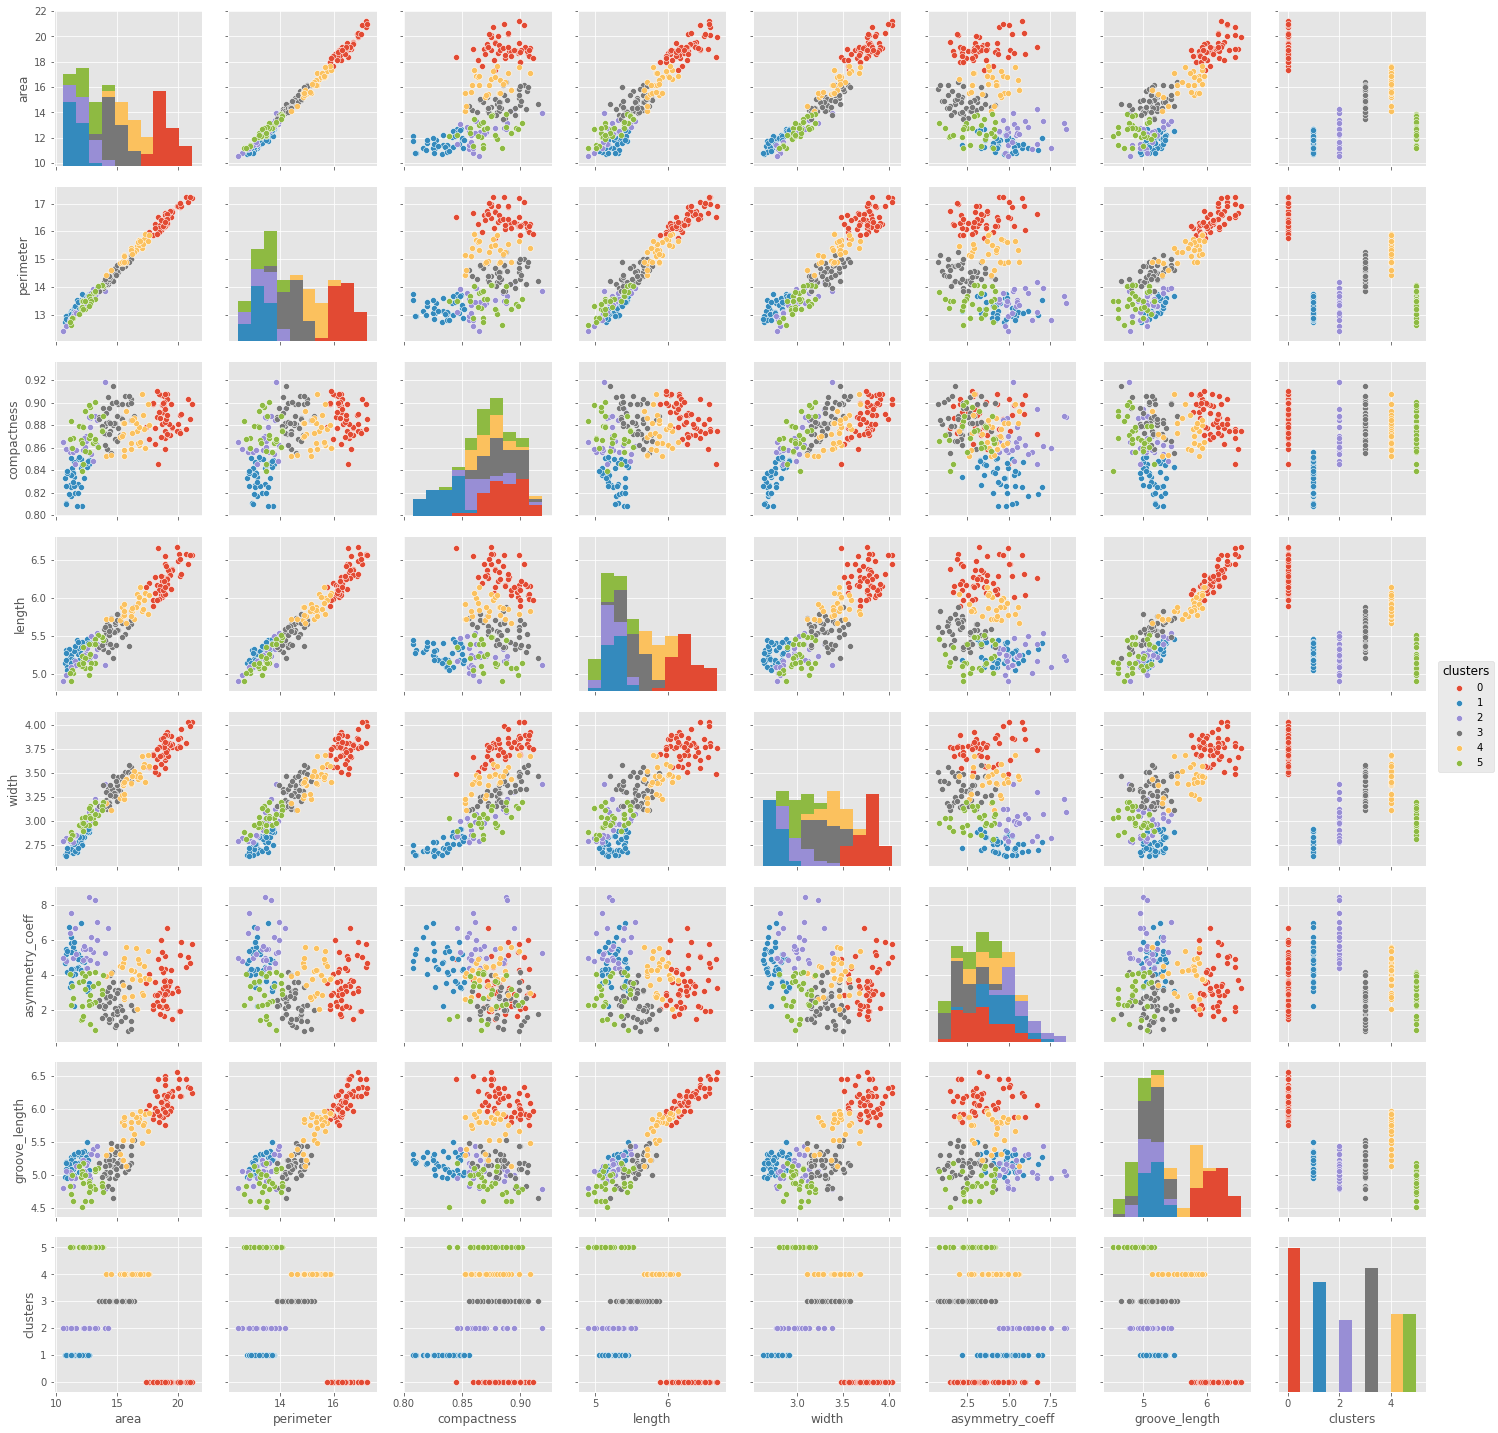

In [188]:
labels = k_mean_6.labels_
Xwith6 = seeds.copy(deep=True)
Xwith6['clusters']= labels
sns.pairplot(data=Xwith6, hue='clusters')

### 8. Build a function to find the optimal number of clusters using silhouette score as the criteria.
1. Function should accept a range and a dataframe as arguments
2. Returns the optimal K value, associate silhoutte and scaling method.
3. Your function should also consider the scaled results of the data. 
    - `normalize`, `StandardScaler`, `MinMaxScaler`


Once you have found the optimal K and version of the data, visualize the clusters.





In [189]:
# A:
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler

In [264]:
kmeans_res = pd.DataFrame(columns=['score', 'method'])

In [265]:
def get_cluster(num, data, method):
    for k in range(2, num):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        labels = kmeans.labels_
        score = silhouette_score(data, labels)
        kmeans_res.loc[len(kmeans_res)] = [score, method]
    return kmeans_res.sort_values

In [266]:
def clusters(num, data):
    
    Xn = normalize(data)
    get_cluster(num, Xn, 'norm')
    
    ss = StandardScaler()
    Xstd = ss.fit_transform(data)
    get_cluster(num, Xstd, 'ss')
    
    mm = MinMaxScaler()
    Xmm = mm.fit_transform(data)
    get_cluster(num, Xmm, 'mm')

    return kmeans_res

In [267]:
X.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [271]:
optimal_cls = clusters(5, X)

In [274]:
optimal_cls.head(1)

,score,method
0,0.501449,norm
